<a href="https://colab.research.google.com/github/Scr3amind/ProcesamientoLenguajeNatural/blob/master/Tarea1_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practica 1**

Procesamiento de Lenguaje Natural.

Facultad de Ingeniería, UNAM

Cruz Santos Isaac


**Objetivo:** Obtener la curva de Zipf de los tipos de un corpus en escala logarítmica y determinar el parámetro α correspondiente a esa distribución.

Pasos a seguir:

*1. Escoger un corpus de cualquier idioma y de un tamaño mayor a 10 000
tokens (se puede tomar este corpus de la paquetería nltk.corpus).*

In [0]:
#Importamos los paquetes necesarios
import nltk
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter
from nltk.stem.snowball import SnowballStemmer


In [0]:
#Para limpiar el corpus
tokenizer = RegexpTokenizer(r'\w+')

In [3]:
#Descargando Corpus
nltk.download('gutenberg')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
#Escogemos un corpus
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
corpus_Melville = nltk.corpus.gutenberg.words('melville-moby_dick.txt')

#Verificamos que cumpla con las 10,000 palabras
len(corpus_Melville)

260819

*2. **Limpiar el corpus:** eliminar signos de puntuación, de interrogación, admiración y elementos no léxicos.*




In [0]:
#Limpiando el Corpus
corpus_Melville = " ".join(corpus_Melville)

corpus_Melville= tokenizer.tokenize(corpus_Melville)#Eliminando signos de admiracion

corpus_Melville = [p.lower() for p in corpus_Melville]#Todo a minusculas


*3. Aplicar un algoritmo de Stemming a los tokens limpios.*

In [0]:
#Aplicamos el algoritmo Snowball para hacer stemming
stemmer = SnowballStemmer("english")
corpus_Melville = [stemmer.stem(p) for p in corpus_Melville]




*4. Obtener las frecuencias de los tipos en el corpus.*

In [0]:
#Obteniendo las frecuencias
word_freqs = Counter(corpus_Melville)

#Ordenando las frecuencias de mayor a menor
word_freqs = sorted(word_freqs.items(), key=itemgetter(1), reverse=True)
#Separando frecuencias en array
freqs = np.array([pair[1] for pair in word_freqs])


*5. Ordenar por el rango estadístico de mayor a menor.*



In [0]:
#Número de tipos N
N = len(freqs)
#Obtiendo array con rangos
ranks = np.array(range(1,N+1))


#Aplicando logaritmos
log_freqs = np.log(freqs)
log_ranks = np.log(ranks)



*6. Graficar el diagrama de dispersión rango-frecuencia en escala logarítmica.*

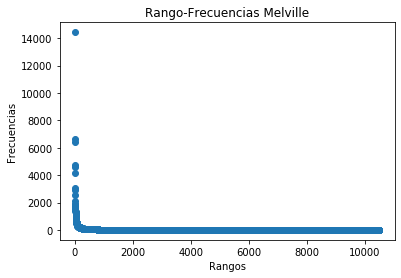

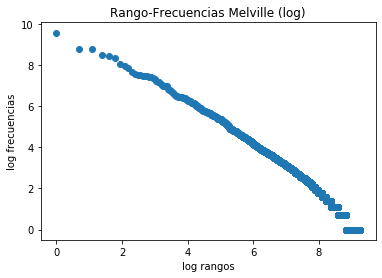

In [10]:
#Graficando

plt.scatter(ranks, freqs)
plt.xlabel('Rangos')
plt.ylabel('Frecuencias')
plt.title('Rango-Frecuencias Melville')
plt.show()

plt.scatter(log_ranks, log_freqs)
plt.xlabel('log rangos')
plt.ylabel('log frecuencias')
plt.title('Rango-Frecuencias Melville (log)')
plt.show()

7. Obtener el parámetro de la distribución de Zipf, α (a partir de un procedimiento de regresión).


-1.353664918745988


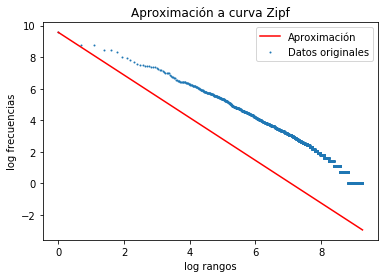

In [11]:
#Rangos
ranks_data = pd.DataFrame(data=log_ranks, columns=['log rangos'])
#Frecuencias
freqs_data = pd.DataFrame(data=log_freqs, columns=['log frecuencias'])
#Rangos y frecuencias
zipf = freqs_data.join(ranks_data)


#Estimación de parámetro
standard_deviation_ranks = ranks_data.std()
standard_deviation_freqs = freqs_data.std()
pearson_corr = float(zipf.corr(method='pearson')['log rangos']['log frecuencias'])

std_coeff = float(standard_deviation_freqs)/float(standard_deviation_ranks)
a = pearson_corr *std_coeff

print(a)

#Ploteo
plt.scatter(log_ranks, log_freqs, s=1, label='Datos originales')
plt.plot(log_ranks, a*log_ranks+log_freqs[0], c='r', label='Aproximación')
plt.xlabel('log rangos')
plt.ylabel('log frecuencias')
plt.title('Aproximación a curva Zipf')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()